<a href="https://colab.research.google.com/github/chayakim/EFIMM0139/blob/main/Sainsbury's_Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Sainsbury's"** Topic Modelling (from negative tweets)

---

In [ ]:
! pip install -q pandas gensim pyLDAvis bertopic nltk gdown matplotlib seaborn

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models
from bertopic import BERTopic
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

/usr/local/lib/python3.11/dist-packages/hdbscan/plots.py:448: DeprecationWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.11/dist-packages/hdbscan/robust_single_linkage_.py:154: DeprecationWarning: invalid escape sequence '\{'
  """Perform robust single linkage clustering from a vector array
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# **Text Processing**

In [ ]:
#Sainsbury data
df_tweet_sains = pd.read_excel('Negative.xlsx')
df_tweet_sains.dropna(subset=['cleaned_text'], inplace=True)

df_sains = df_tweet_sains.reset_index(drop=True)
print(df_sains.head(5))



           created_at                                       cleaned_text  \
0 2020-10-01 01:12:18  caralisette concern hard produce sensible nont...   
1 2020-10-01 07:38:04                                 yes keep get reply   
2 2020-10-01 07:50:41  argos_online pm last night none staff argos br...   
3 2020-10-01 08:29:33  helpful thank keep go meantime continue buy lo...   
4 2020-10-01 09:01:42  caralisette terrible especially frighten sorry...   

  sentiment  
0  negative  
1  negative  
2  negative  
3  negative  
4  negative  


In [ ]:
# Combine standard and custom stopwords
nltk_stopwords = set(stopwords.words('english'))
custom_stopwords = {
    "already", "another", "awful", "bad", "business", "company", "customer",
    "daveatherton", "days", "disappoint", "employees", "expensive", "face", "feature", "find",
    "fuck", "hear", "horrible", "long", "make", "minutes", "month", "nice", "notice", "online",
    "organization", "poorscousertom", "really", "report", "ridiculous", "sad", "security", "see",
    "service", "services", "shame", "stupid", "take", "terrible", "tomorrow", "vile", "wear",
    "week", "work", "worse", "worst", "year", "andyburnhamgm","shop","store"
}
final_stopwords = nltk_stopwords.union(custom_stopwords)

# Tokenization function
def tokenize_text(text):
    if pd.isnull(text):
        return []
    words = word_tokenize(str(text).lower())
    return [word for word in words if word.isalnum() and word not in final_stopwords]

df_sains['tokens'] = df_sains['cleaned_text'].apply(tokenize_text)

print(df_sains['tokens'].head())

0    [caralisette, concern, hard, produce, sensible...
1                              [yes, keep, get, reply]
2    [pm, last, night, none, staff, argos, bridgeme...
3    [helpful, thank, keep, go, meantime, continue,...
4    [caralisette, especially, frighten, sorry, any...
Name: tokens, dtype: object


# **Building LDA and BERTopics**

In [ ]:
from gensim import corpora
import gensim
from bertopic import BERTopic

# Define DataFrame names
sample_names = ["df_sains"]


for sample_name in sample_names:
    print(f"\n============================\nResults for {sample_name}\n============================\n")


    # Retrieve the DataFrame dynamically
    sample_df = globals()[sample_name]

    # ------------------------------
    # LDA Topic Modeling
    # ------------------------------
    dictionary_tweet = corpora.Dictionary(sample_df['tokens'])
    corpus_tweet = [dictionary_tweet.doc2bow(text) for text in sample_df['tokens']]

    # Set number of topics
    num_topics = 10
    lda_model_tweet = gensim.models.LdaModel(
        corpus=corpus_tweet,
        id2word=dictionary_tweet,
        num_topics=num_topics,
        random_state=42,
        passes=15,
        iterations=500,
        alpha='auto',
        eta='auto',
        minimum_probability=0.01
    )

    # Output LDA topics with top 10 keywords
    print("----- LDA Topics with Sentiment Matches -----")
    for topic_id, words in lda_model_tweet.show_topics(num_topics=num_topics, num_words=10, formatted=False):
        # words is a list of (word, weight) tuples.
        topic_words = [word for word, _ in words]
        print(f"Topic {topic_id}: {topic_words}")

    # ------------------------------
    # BERTopic Modeling
    # ------------------------------
    # Fit BERTopic on the text column
    topic_model_tweet = BERTopic()
    topics_tweet, probs_tweet = topic_model_tweet.fit_transform(sample_df['cleaned_text'])

    # Get BERTopic topics
    bertopic_topics = topic_model_tweet.get_topics()
    num_bertopic_topics = len(bertopic_topics)

    # Output BERTopic topics
    print("\n----- BERTopic Topics with Sentiment Matches -----")
    print(f"{num_bertopic_topics} Topics Found")
    for topic_id, words in bertopic_topics.items():
        # words is a list of (word, score) tuples.
        top_words = words[:10]
        topic_words = [word for word, _ in top_words]
        print(f"Topic {topic_id}: {topic_words}")


Results for df_sains

----- LDA Topics with Sentiment Matches -----
Topic 0: ['gravy', 'collect', 'excludeduk', 'fruit', 'sainsburysnews', 'package', 'forgottenltd', 'deal', 'thing', 'massive']
Topic 1: ['delivery', 'please', 'try', 'tell', 'call', 'order', 'slot', 'wait', 'help', 'stock']
Topic 2: ['get', 'food', 'buy', 'use', 'back', 'could', 'time', 'order', 'give', 'thank']
Topic 3: ['people', 'go', 'would', 'say', 'like', 'think', 'black', 'one', 'need', 'advert']
Topic 4: ['coopuk', 'turkey', 'channel', 'box', 'dinner', 'together', 'hours', 'families', 'ads', 'eat']
Topic 5: ['best', 'purchase', 'mind', 'exposelies', 'vanillaismd', 'exchange', 'receipt', 'move', 'chunhuams', 'coolrunning']
Topic 6: ['nectar', 'bag', 'click', 'park', 'via', 'account', 'months', 'till', 'amount', 'double']
Topic 7: ['christmas', 'mask', 'donate', 'navyreg', 'drive', 'available', 'soon', 'million', 'borisjohnson', 'rishisunak']
Topic 8: ['day', 'deliver', 'open', 'date', 'items', 'two', 'receive', 

# **Evaluation**

1.  Coherence Evaluation
2.  Diversity



**Coherence Score**

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Extract the top 10 keywords for each BERTopic topic
ber_topic_tokens = [[word for word, _ in topic[:10]] for topic in bertopic_topics.values()]

# Filter out any empty topics to avoid errors
ber_topic_tokens = [topic for topic in ber_topic_tokens if topic]

# Compute Coherence Score for LDA
coherence_model_lda = CoherenceModel(
    model=lda_model_tweet, texts= sample_df['tokens'], dictionary=dictionary_tweet, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()

# Convert BERTopic tokens to token IDs using the LDA dictionary
ber_topic_token_ids = [[dictionary_tweet.token2id.get(word, -1) for word in topic] for topic in ber_topic_tokens]  # -1 for unknown words
ber_topic_token_ids = [[token_id for token_id in topic if token_id != -1] for topic in ber_topic_token_ids] # Filter out -1(out-of-vocabulary)

# Filter out empty lists from ber_topic_token_ids
ber_topic_token_ids = [topic_ids for topic_ids in ber_topic_token_ids if topic_ids]

# Compute Coherence Score for BERTopic using the LDA dictionary
coherence_model_bertopic = CoherenceModel(
    topics=ber_topic_token_ids, texts=sample_df['tokens'], dictionary=dictionary_tweet, coherence='c_v'
)
coherence_bertopic = coherence_model_bertopic.get_coherence()

print(f"LDA Coherence Score: {coherence_lda:.3f}")
print(f"BERTopic Coherence Score: {coherence_bertopic:.3f}")

LDA Coherence Score: 0.422
BERTopic Coherence Score: 0.469


**Diversity**

In [ ]:
# LDA diversity
def calculate_lda_topic_diversity(lda_model, top_n_words=10):
    topics = lda_model.show_topics(num_topics=lda_model.num_topics, num_words=top_n_words, formatted=False)
    unique_words = set()
    for topic in topics:
        unique_words.update([word for word, _ in topic[1]])
    return len(unique_words) / (top_n_words * lda_model.num_topics)

lda_topic_diversity = calculate_lda_topic_diversity(lda_model_tweet)

# BERTopic diversity
def calculate_topic_diversity(model, top_n_words=10):
    words = model.get_topics()
    unique_words = set()
    for topic in words.values():
        unique_words.update([word for word, _ in topic[:top_n_words]])
    return len(unique_words) / (top_n_words * len(words))

bertopic_topic_diversity = calculate_topic_diversity(topic_model_tweet)

print(f"LDA Topic Diversity Score: {lda_topic_diversity:.3f}")
print(f"BERTopic Topic Diversity Score: {bertopic_topic_diversity:.3f}")


LDA Topic Diversity Score: 0.993
BERTopic Topic Diversity Score: 0.844


# **Finding Optimal number of topics**

### Using Coherence score to calculate

Num Topics: 2, Coherence Score: 0.4914
Num Topics: 3, Coherence Score: 0.4699
Num Topics: 4, Coherence Score: 0.4470
Num Topics: 5, Coherence Score: 0.4188
Num Topics: 6, Coherence Score: 0.3929
Num Topics: 7, Coherence Score: 0.4652
Num Topics: 8, Coherence Score: 0.4245
Num Topics: 9, Coherence Score: 0.4320
Num Topics: 10, Coherence Score: 0.4551
Num Topics: 11, Coherence Score: 0.4182
Num Topics: 12, Coherence Score: 0.3936
Num Topics: 13, Coherence Score: 0.4416
Num Topics: 14, Coherence Score: 0.4181
Num Topics: 15, Coherence Score: 0.3969
Num Topics: 16, Coherence Score: 0.3965
Num Topics: 17, Coherence Score: 0.3891
Num Topics: 18, Coherence Score: 0.4006
Num Topics: 19, Coherence Score: 0.3664


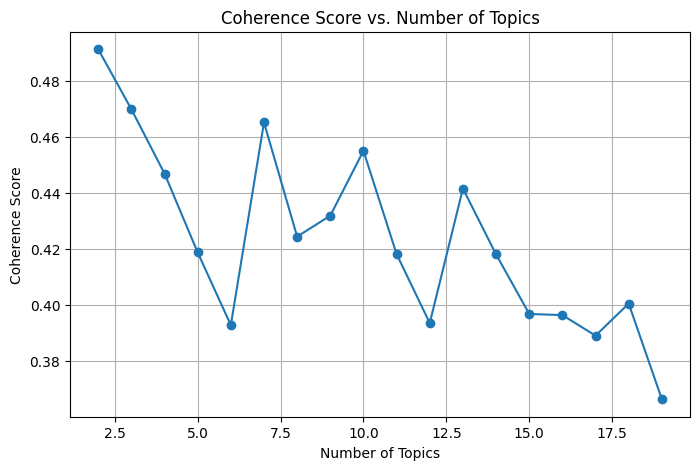

Optimal Number of Topics: 2


In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Convert the 'tokens' column in the DataFrame to a list of tokenized texts
tokenized_texts = sample_df['tokens'].tolist()

# Create a dictionary mapping each word
dictionary_tweet = corpora.Dictionary(tokenized_texts)

# Convert each tokenized text into a BoW
corpus_tweet = [dictionary_tweet.doc2bow(text) for text in tokenized_texts]

# Compute coherence scores over a range of topic numbers
def compute_coherence_values(dictionary, corpus, texts, topic_range):
    coherence_scores = []
    # Loop over each number of topics to evaluate model coherence and train LDA model with the specified number of topics
    for num_topics in topic_range:
        lda_model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=10,
            iterations=200
        )

        # Compute coherence score using the c_v metric
        coherence_model = CoherenceModel(
            model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v'
        )
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)
        print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

    return coherence_scores

# Define the range of topic numbers to evaluate
topic_range = range(2, 20)

# Compute coherence scores across the specified topic range
coherence_scores = compute_coherence_values(dictionary_tweet, corpus_tweet, tokenized_texts, topic_range)

# Plot the coherance scores
plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.grid()
plt.show()

optimal_topic_num = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal Number of Topics: {optimal_topic_num}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Num Topics: 2, Coherence Score: 0.4623
Num Topics: 3, Coherence Score: 0.6004
Num Topics: 4, Coherence Score: 0.4268
Num Topics: 5, Coherence Score: 0.4341
Num Topics: 6, Coherence Score: 0.4974
Num Topics: 7, Coherence Score: 0.5237
Num Topics: 8, Coherence Score: 0.5661
Num Topics: 9, Coherence Score: 0.5328
Num Topics: 10, Coherence Score: 0.4588
Num Topics: 11, Coherence Score: 0.4858
Num Topics: 12, Coherence Score: 0.4878
Num Topics: 13, Coherence Score: 0.4838
Num Topics: 14, Coherence Score: 0.4891
Num Topics: 15, Coherence Score: 0.5165
Num Topics: 16, Coherence Score: 0.4720
Num Topics: 17, Coherence Score: 0.4219
Num Topics: 18, Coherence Score: 0.4801
Num Topics: 19, Coherence Score: 0.5032


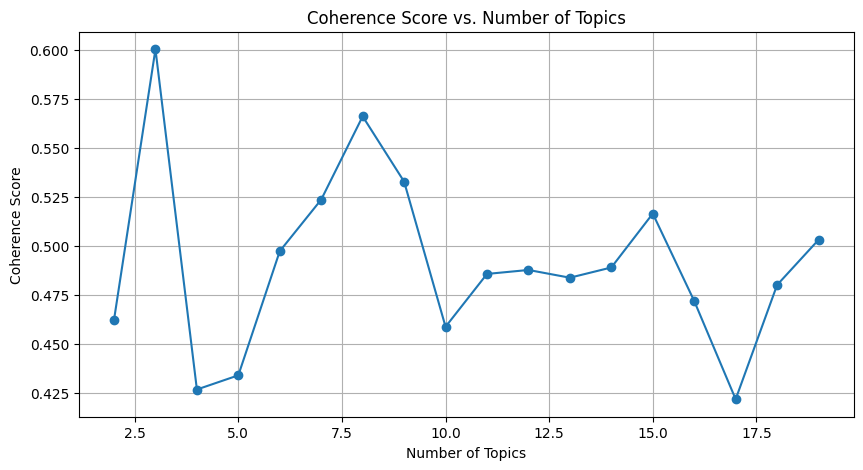

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize the text data for coherence calculation
docs_tokenized = [word_tokenize(doc.lower()) for doc in sample_df['cleaned_text']]

# Initialize list to store coherence scores
coherence_scores = []
topic_range = range(2, 20)

for n_topics in topic_range:
    # Fit BERTopic with a set number of topics
    topic_model = BERTopic(nr_topics=n_topics)
    topics, probs = topic_model.fit_transform(sample_df['cleaned_text'])

    # Extract topic words
    topic_words = [topic_model.get_topic(i) for i in range(n_topics)]
    topic_words = [[word for word, _ in topic] for topic in topic_words if topic]

    # Prepare dictionary for coherence model
    dictionary = Dictionary(docs_tokenized)

    # Compute Coherence Score using the c_v metric
    coherence_model = CoherenceModel(topics=topic_words,
                                     texts=docs_tokenized,
                                     dictionary=dictionary,
                                     coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

    # Print the coherence score
    print(f"Num Topics: {n_topics}, Coherence Score: {coherence_score:.4f}")

# Plot coherence score for each topic number
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.grid(True)
plt.show()

# **Visualization**

# **Topic Terms**

In [ ]:
# Visualize the top 3 topics in the topic model
topic_model_tweet.visualize_barchart(top_n_topics=3)